In [2]:
import networkx as nx  # https://networkx.github.io/documentation/networkx-1.11/reference/introduction.html
import matplotlib.pyplot as plt
import numpy as np
from queue import Queue
import heapq

# Graph Theory

## Search functions

In [3]:
def bfs(G, s):
    """
    This is a breadth first search algorithm that will return the distance of all of the vertices from the start vertex s. 
    
    Input:
    G -- The input graph
    s -- The start vertex
    
    Return: 
    dist -- a distance vector of each vertex from the start vertex s
    
    """
    
    dist = {}
    
    for v in G:
        dist[v] = np.inf
    
    dist[s] = 0  # initalize start vertex distance to 0
    
    q = Queue()
    q.put(s)
    
    while not q.empty():
        u = q.get()
        for v in nx.all_neighbors(G, u):
            if np.isinf(dist[v]):
                q.put(v)
                dist[v] = dist[u] + 1
    
    return dist

In [4]:
def dijkstras(G, s):
    
    dist = {}
    prev = {}
    q = []
    
    for v in G:
        dist[v] = 0 if v == s else 999  # 999 represents infinity   
        prev[v] = None
        heapq.heappush(q, (dist[v], v))
    
    while q:
        u = heapq.heappop(q)[1]
        for v, attr in G[u].items():
            weight = attr['weight']
            if dist[v] > dist[u] + weight:
                dist[v] = dist[u] + weight
                heapq.heappush(q, (dist[v], v))
                prev[v] = u
    
    return dist, prev
    

In [5]:
def dfs(G):
    """
    This is a depth first search algorithm that will return the pre/post orderings of all of the nodes within the graph. 
    
    Input:
    G -- The input graph
    s -- The start vertex
    
    Return: 
    ordering -- the pre/post ordering of all of the discoverable graph vertices from start vertex s 
    
    """
    visited = {}
    ordering = {}
    c = 0
    
    for v in G:
        visited[v] = False
        ordering[v] = (0,0)  # initialize to empty tuple for the (pre,post) ordering
        
    for v in G:
        if not visited[v]:
            explore(G, v, visited, ordering, c)
    
    return ordering
    

def explore(G, v, visited, ordering, c):
    """
    The recursive explore method that explores all of the reachable nodes from a given start. 
    
    Input:
    G -- The input graph
    s -- The start vertex
    
    Return:
    c -- the clock num tracking used for the pre/post visits
    
    
    """
    visited[v] = True
    c += 1
    ordering[v] = (c, ordering[v][1])  # update previst
    
    for u in nx.all_neighbors(G, v): 
        if not visited[u]:
            c = explore(G, u, visited, ordering, c)
    
    c += 1
    ordering[v] = (ordering[v][0], c)  # update postvist
    return c

## Utility functions

In [7]:
def reverse_graph(G):
    G_prime = nx.DiGraph()
    elist = []
    
    
    for e in G.edges():
        elist.append((e[1], e[0]))
    
    G_prime.add_edges_from(elist)
    return G_prime

In [23]:
def sccs(G):
    """
    Algorithm to find the strongly connected components of a graph G.
    
    Input:
    G -- the graph G
    
    Output:
    scc_dag -- a new DAG of the scc components
    sss_comp -- the composition of vertices in each component group
    """
    
    G_r = reverse_graph(G)
    nx.draw_networkx(G_r, with_labels=True)
    plt.show()
    print(dfs(G_r))

In [ ]:
def topological_sort(dag):
    """
    Algorithm that will give the topological sorting of a DAG. 
    
    Input:
    dag -- the input must be a directed acyclic graph
    
    Output:
    topo_sort -- an array of vertices representing the topological sort of the vertices
    """

## Figures

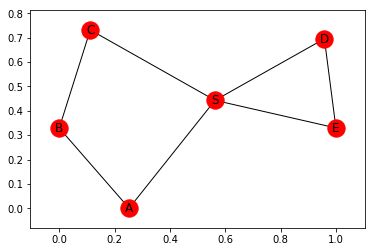

In [8]:
# Figure 4.1 in DPV Algorithms
G = nx.Graph()
elist = [('E', 'S'), ('E', 'D'), ('S', 'D'), ('S', 'C'), ('S', 'A'), ('A', 'B'), ('B', 'C')]
G.add_edges_from(elist)
nx.draw_networkx(G, with_labels=True)
plt.show()

In [9]:
print(bfs(G, 'S'))

{'E': 1, 'S': 0, 'D': 1, 'C': 1, 'A': 1, 'B': 2}


In [10]:
dfs(G)

{'A': (7, 8),
 'B': (6, 9),
 'C': (5, 10),
 'D': (3, 4),
 'E': (1, 12),
 'S': (2, 11)}

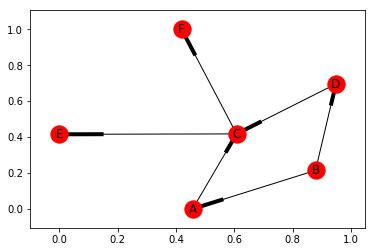

In [11]:
# Figure 3.8 in DPV Algorithms
G = nx.DiGraph()
elist = [('B', 'A'), ('B', 'D'), ('A', 'C'), ('D', 'C'), ('C', 'F'), ('C', 'E')]
G.add_edges_from(elist)
nx.draw_networkx(G, with_labels=True)
plt.show()

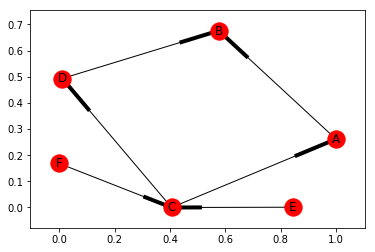

In [12]:
reverse = reverse_graph(G)
nx.draw_networkx(reverse, with_labels=True)
plt.show()

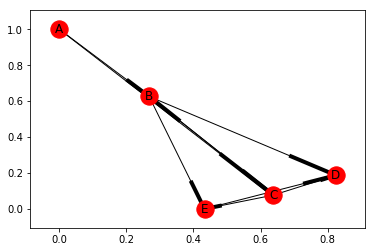

In [13]:
# figure 4.9 
G = nx.DiGraph()
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=1)
G.add_edge('B', 'C', weight=3)
G.add_edge('B', 'D', weight=2)
G.add_edge('B', 'E', weight=3)
G.add_edge('C', 'B', weight=1)
G.add_edge('C', 'D', weight=4)
G.add_edge('C', 'E', weight=5)
G.add_edge('E', 'D', weight=1)
nx.draw_networkx(G, with_labels=True)
plt.show()

In [14]:
# print(dijkstras(G, 'A'))

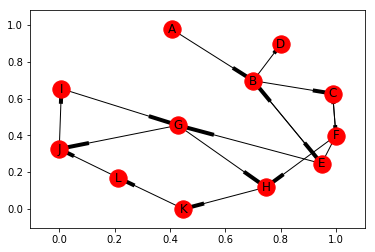

In [15]:
# figure 3.9 
G = nx.DiGraph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('B', 'D')
G.add_edge('B', 'E')
G.add_edge('C', 'F')
G.add_edge('E', 'B')
G.add_edge('E', 'F')
G.add_edge('E', 'G')
G.add_edge('F', 'C')
G.add_edge('F', 'H')
G.add_edge('G', 'H')
G.add_edge('G', 'J')
G.add_edge('H', 'K')
G.add_edge('I', 'G')
G.add_edge('J', 'I')
G.add_edge('K', 'L')
G.add_edge('L', 'J')
nx.draw_networkx(G, with_labels=True)
plt.show()

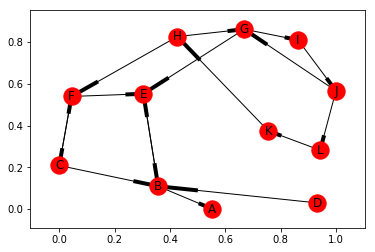

{'B': (1, 24), 'A': (22, 23), 'C': (2, 19), 'D': (20, 21), 'E': (10, 11), 'F': (3, 18), 'G': (9, 12), 'H': (4, 17), 'J': (7, 14), 'K': (5, 16), 'I': (8, 13), 'L': (6, 15)}
None


In [24]:
print(sccs(G))